In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tg
import tg.obj
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [3]:
with open('susan.obj') as f:
    lines = f.readlines()
triangles = tf.constant(tg.obj.load(lines), dtype=tf.float32)
colors = tf.random.uniform(triangles.shape, dtype=tf.float32)

triangles = -triangles * 1000

min = tf.reduce_min(tf.reduce_min(triangles, -2), -2)
max = tf.reduce_max(tf.reduce_max(triangles, -2), -2)
size = max - min

triangles = triangles - min
triangles = triangles

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-05 10:37:22.057754: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-05 10:37:22.057869: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
def shader(xyz):
    return (xyz / size) * (1 - (tf.expand_dims(xyz[:, :, 2], -1) / size))

In [25]:
width, height = int(size[0].numpy()), int(size[1].numpy())

In [26]:
with tf.device("/CPU:0"):
    color, boundaries, depth = tg.render(triangles, colors, width, height, -np.inf, np.inf, shader)

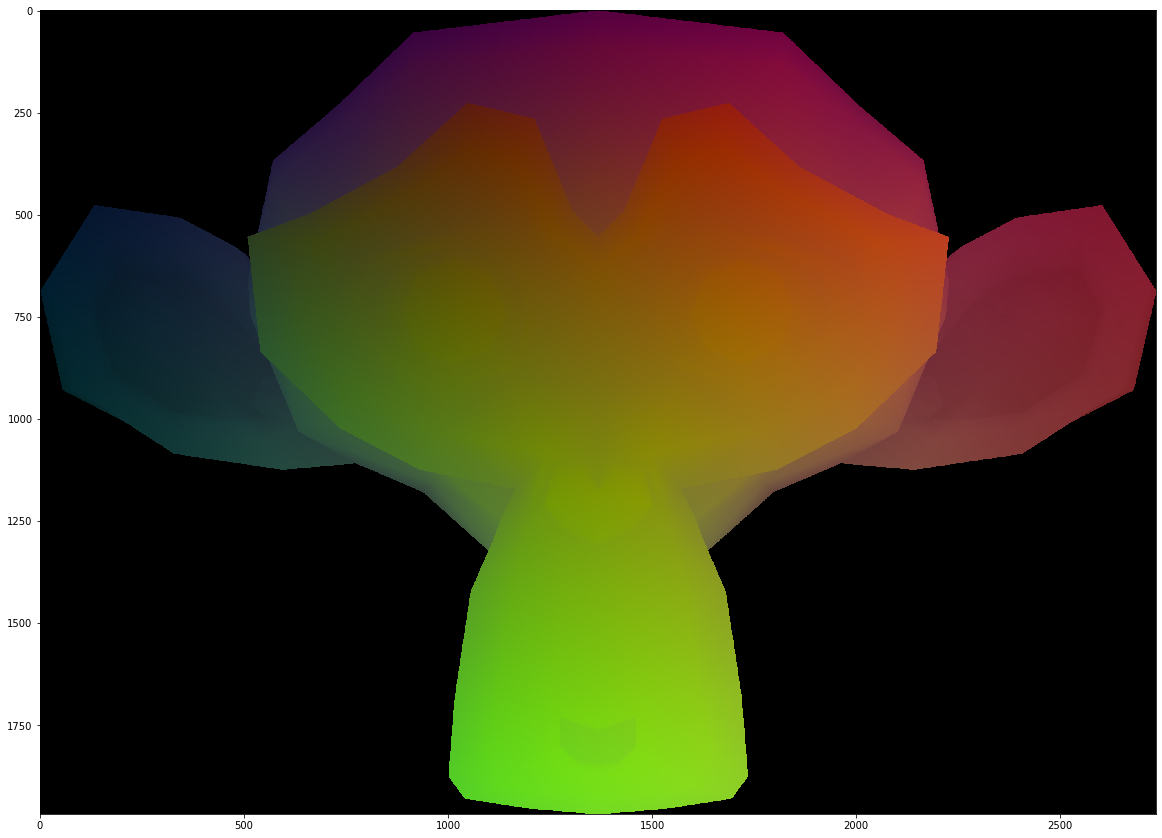

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(
    # tf.transpose(depth),
    tf.transpose(color, (1, 0, 2)),
    interpolation='nearest'
)
pass